In [1]:
import numpy as np
import math
import copy
from itertools import permutations
import matplotlib.pyplot as plt

def Exhaustive_Search_Function(distance_matrix, number_node):
    
    number_solutions = math.factorial(number_node-1)
    route_solutions = list(permutations(range(1, number_node)))
    for i in range(len(route_solutions)):
        route_solutions[i] = list(route_solutions[i])
        route_solutions[i].insert(0, 0)
        route_solutions[i] = tuple(route_solutions[i])
    route_solutions = np.array(route_solutions)
    
    print("======== All of Route Solution from Exhaustive Search ========\n")
    print(route_solutions)
    print("\n==============================================================\n")
    
    
    Sum_of_Distance_solutions = np.zeros(number_solutions)
    
    # Generate All of Solution
    for i in range(number_solutions):
        for j in range(number_node-1):
            Sum_of_Distance_solutions[i] += distance_matrix[route_solutions[i, j], route_solutions[i, j+1]]
        
        Sum_of_Distance_solutions[i] += distance_matrix[route_solutions[i, number_node-1], route_solutions[i, 0]]
    
    print("======== All of Route Distance from Exhaustive Search ========\n")
    print(Sum_of_Distance_solutions)
    print("\n==============================================================")
            
    # Find Short Distance from All of Solution
    index_solution = 0
    short_distance = Sum_of_Distance_solutions[index_solution]
    
    for i in range(1, number_solutions):
        if(short_distance > Sum_of_Distance_solutions[i]):
            short_distance = Sum_of_Distance_solutions[i]
            index_solution = i
    
    return short_distance, route_solutions[index_solution]

def Candidate_Move_Function(Tabu_Search_Solution, number_node):
    temp_solution = copy.copy(Tabu_Search_Solution)
    candidate_move_list = []
    
    index_iter = number_node - 1
    index_step = 1
    
    for i in range(number_node - 2):
        for j in range(1, index_iter):
            temp_move_table = np.zeros(3)
            temp_move_table[0] = temp_solution[j]
            temp_move_table[1] = temp_solution[j+index_step]
            
            # Swap the candidate
            temp2_solution = copy.copy(Tabu_Search_Solution)
            temp2_solution[j] = temp_move_table[1]
            temp2_solution[j+index_step] = temp_move_table[0]
            
            # Calculate the total distance
            for k in range(number_node - 1):
                temp_move_table[2] += distance_matrix[temp2_solution[k], temp2_solution[k+1]]
            
            temp_move_table[2] += distance_matrix[temp2_solution[number_node - 1], temp2_solution[0]]
            
            candidate_move_list.append(temp_move_table)
            
        
        index_step += 1
        index_iter -= 1
    
    candidate_move_list = np.array(candidate_move_list)
    return candidate_move_list

def Update_Tabu_Search_Solution_Function(Tabu_Search_Solution, index_0, index_1, number_node):
    
    temp_solution = copy.copy(Tabu_Search_Solution)
    
    for i in range(1, number_node):
        if (temp_solution[i] == index_0):
            temp_solution[i] = index_1
        elif(temp_solution[i] == index_1):
            temp_solution[i] = index_0
    
    return temp_solution

In [2]:
# Set Parameters for Distance Matrix
number_node = 9
upper_bound = 60
lower_bound = 20

# Set Parameters for Tabu Search Algorithm
number_iteration = 500
aspiration_criterion = 30
tabu_tenure = 10

# Initialize The Distance Matrix
distance_matrix = np.zeros((number_node, number_node))
for i in range(number_node):
    for j in range(i):
        distance_matrix[i, j] = np.random.randint(low = lower_bound, high = upper_bound)
        distance_matrix[j, i] = distance_matrix[i, j]


print("======================== Distance Matrix Value ========================\n")
print(distance_matrix)
print("\n=======================================================================")

======================== Distance Matrix Value ========================

[[ 0. 38. 24. 32. 33. 58. 34. 31. 36.]
 [38.  0. 56. 37. 53. 37. 29. 49. 43.]
 [24. 56.  0. 53. 55. 28. 25. 53. 26.]
 [32. 37. 53.  0. 40. 34. 54. 31. 26.]
 [33. 53. 55. 40.  0. 50. 36. 38. 48.]
 [58. 37. 28. 34. 50.  0. 36. 33. 24.]
 [34. 29. 25. 54. 36. 36.  0. 46. 24.]
 [31. 49. 53. 31. 38. 33. 46.  0. 51.]
 [36. 43. 26. 26. 48. 24. 24. 51.  0.]]



In [3]:
# Main Program
Best_Route_Solution = []
Best_Shortest_Distance_Value = []

# Initialize Solution for Tabu Search Algorithm
Tabu_Search_Solution = np.arange(1, number_node)
np.random.shuffle(Tabu_Search_Solution)
Tabu_Search_Solution = list(Tabu_Search_Solution)
Tabu_Search_Solution.insert(0, 0)
Tabu_Search_Solution = np.array(Tabu_Search_Solution)

# Calculate the initialization of shortest distance from Tabu Search Solution
Shortest_Distance_Tabu_Search = 0
for i in range(number_node - 1):
    Shortest_Distance_Tabu_Search += distance_matrix[Tabu_Search_Solution[i], Tabu_Search_Solution[i+1]]

Shortest_Distance_Tabu_Search += distance_matrix[Tabu_Search_Solution[number_node-1], Tabu_Search_Solution[0]]

Best_Route_Solution.append(Tabu_Search_Solution)
Best_Shortest_Distance_Value.append(Shortest_Distance_Tabu_Search)

# Initialize Tabu List
tabu_list = np.zeros((number_node, number_node))

# Tabu Search Algorithm
for i in range(number_iteration):
    new_candidate_move_list = []
    new_candidate_move_list = Candidate_Move_Function(Tabu_Search_Solution, number_node)
    
     # Sort The Candidate move list based on the shortest distance
    candidate_move_table =  copy.copy(new_candidate_move_list)
    candidate_move_table = candidate_move_table[np.argsort(candidate_move_table[:, 2])]
    
    length_candidate_move_table = len(candidate_move_table)
    
    # Penalize Objective Value by Frequency using the lower diagonal
    for j in range(length_candidate_move_table):
        if(candidate_move_table[j, 0] < candidate_move_table[j, 1]):
            index_row = candidate_move_table[j, 1]
            index_col = candidate_move_table[j, 0]
        else:
            index_row = candidate_move_table[j, 0]
            index_col = candidate_move_table[j, 1]
        
        index_row = int(index_row)
        index_col = int(index_col)
        
        candidate_move_table[j, 2] += tabu_list[index_row, index_col]
        
    # Sort The Candidate move list based on the shortest distance after penalized it
    candidate_move_table = copy.copy(new_candidate_move_list)
    candidate_move_table = candidate_move_table[np.argsort(candidate_move_table[:, 2])]
    
    # Choose a move from candidate_move_table
    for j in range(length_candidate_move_table):
        if(candidate_move_table[j, 0] > candidate_move_table[j, 1]):
            index_row = candidate_move_table[j, 1]
            index_col = candidate_move_table[j, 0]
        else:
            index_row = candidate_move_table[j, 0]
            index_col = candidate_move_table[j, 1]
            
        index_row = int(index_row)
        index_col = int(index_col)
        
        # Check if the move is tabu or not using the higher diagonal
        if(tabu_list[index_row, index_col] == 0):
            Shortest_Distance_Tabu_Search = candidate_move_table[j, 2]
            
            # Update the route solution
            New_Tabu_Search_Solution = []
            New_Tabu_Search_Solution = Update_Tabu_Search_Solution_Function(Tabu_Search_Solution, candidate_move_table[j, 0], candidate_move_table[j, 1], number_node)
            
            Tabu_Search_Solution = copy.copy(New_Tabu_Search_Solution)
            
            # Update the Tabu List tenure in higher diagonal
            tabu_list[index_row, index_col] = tabu_tenure
            
            # Update the Tabu List frequency in lower diagonal
            tabu_list[index_col, index_row] += 1
            
            break
            
        elif(tabu_list[index_row, index_col] > 0):
            # Check if it meets aspiration criteria
            temp_diff = Shortest_Distance_Tabu_Search - candidate_move_table[j, 2]
            
            if (temp_diff > aspiration_criterion):
                Shortest_Distance_Tabu_Search = candidate_move_table[j, 2]
                
                New_Tabu_Search_Solution = []
                New_Tabu_Search_Solution = Update_Tabu_Search_Solution_Function(Tabu_Search_Solution, candidate_move_table[j, 0], candidate_move_table[j, 1], number_node)
                
                Tabu_Search_Solution = copy.copy(New_Tabu_Search_Solution)
            
                # Reset the Tabu List tenure in higher diagonal
                tabu_list[index_row, index_col] = tabu_tenure
            
                # Update the Tabu List frequency in lower diagonal
                tabu_list[index_col, index_row] += 1
                
                break
    
    # Update Tabu Tenure List
    for j in range(number_node):
        for k in range(j+1, number_node):
            if (tabu_list[j, k] > 0):
                tabu_list[j, k] -= 1        
    
    if(Best_Shortest_Distance_Value[i] < Shortest_Distance_Tabu_Search):
        Best_Route_Solution.append(Best_Route_Solution[i])
        Best_Shortest_Distance_Value.append(Best_Shortest_Distance_Value[i])
    else:
        Best_Route_Solution.append(Tabu_Search_Solution)
        Best_Shortest_Distance_Value.append(Shortest_Distance_Tabu_Search)

In [4]:
# Find Route Solution and Shortest Distance using Exhaustive Search Algorithm
Global_Optimal_Shortest_Distance_Solution, Optimal_Route_Solution = Exhaustive_Search_Function(distance_matrix, number_node)

======== All of Route Solution from Exhaustive Search ========

[[0 1 2 ... 6 7 8]
 [0 1 2 ... 6 8 7]
 [0 1 2 ... 7 6 8]
 ...
 [0 8 7 ... 2 3 1]
 [0 8 7 ... 3 1 2]
 [0 8 7 ... 3 2 1]]


======== All of Route Distance from Exhaustive Search ========

[406. 379. 376. ... 402. 376. 406.]



In [5]:
# Tabu tenure and frequency penalty Table
print(tabu_list)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  5.  0.  0.]
 [ 0. 20.  0.  4.  0.  0.  0.  0.  3.]
 [ 0.  7. 17.  0.  7.  9.  0.  2.  6.]
 [ 0. 33. 10. 28.  0.  0.  0.  0.  0.]
 [ 0.  5.  3. 33.  6.  0.  0.  0.  0.]
 [ 0. 26.  6. 29.  3. 35.  0.  0.  0.]
 [ 0. 10.  0. 31. 38.  5.  6.  0.  8.]
 [ 0. 33. 25. 19.  3. 34.  7. 28.  0.]]



The Route Solution using Tabu Search Algorithm :  [0 2 6 1 5 8 3 7 4]
The Shortest distance using Tabu Search Algorithm :  267.0


The Route Solution using Exhaustive Search Algorithm :  [0 2 6 1 5 8 3 7 4]
The Shortest distance using Exhaustive Search Algorithm :  267.0


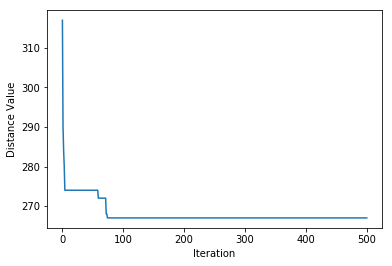

In [6]:
print("\n=====================================================================================")
print "The Route Solution using Tabu Search Algorithm : ",
print Tabu_Search_Solution
print "The Shortest distance using Tabu Search Algorithm : ",
print Shortest_Distance_Tabu_Search

print "\n"

print "The Route Solution using Exhaustive Search Algorithm : ",
print Optimal_Route_Solution
print "The Shortest distance using Exhaustive Search Algorithm : ",
print Global_Optimal_Shortest_Distance_Solution

print("=====================================================================================")

plt.plot(Best_Shortest_Distance_Value)
plt.ylabel('Distance Value')
plt.xlabel('Iteration')
plt.show()